In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
import optuna
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso

sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 82)

# Data Exploration

In [2]:
# Load the dataset (Assuming 'train.csv' contains the required columns)
train0 = pd.read_csv('train.csv')
test0 = pd.read_csv('test.csv')

In [3]:
train0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [4]:
test0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [5]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
train0.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
test0.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Combine test and train

In [9]:
target = train0['SalePrice'] # Target variable
test_id = test0['Id']

train1 = train0.drop(['Id', 'SalePrice'], axis = 1)
test1 = test0.drop(['Id'], axis = 1)
 
data0 = pd.concat([train1,test1], axis=0).reset_index(drop = True)

In [10]:
data1 = data0.copy()

# Treating missing value

In [11]:
print('% of missing values in each column: ')
for column, percentage in (data1.isnull().sum().sort_values(ascending=False) / data1.shape[0] * 100).items():
    count = math.ceil(percentage)
    if count > 0:
        print(f"{column}  : {count}% --------{np.dtype(data1[column])}\n")

% of missing values in each column: 
PoolQC  : 100% --------object

MiscFeature  : 97% --------object

Alley  : 94% --------object

Fence  : 81% --------object

FireplaceQu  : 49% --------object

LotFrontage  : 17% --------float64

GarageYrBlt  : 6% --------float64

GarageFinish  : 6% --------object

GarageQual  : 6% --------object

GarageCond  : 6% --------object

GarageType  : 6% --------object

BsmtExposure  : 3% --------object

BsmtCond  : 3% --------object

BsmtQual  : 3% --------object

BsmtFinType2  : 3% --------object

BsmtFinType1  : 3% --------object

MasVnrType  : 1% --------object

MasVnrArea  : 1% --------float64

MSZoning  : 1% --------object

Functional  : 1% --------object

BsmtHalfBath  : 1% --------float64

BsmtFullBath  : 1% --------float64

Utilities  : 1% --------object

SaleType  : 1% --------object

BsmtFinSF1  : 1% --------float64

KitchenQual  : 1% --------object

GarageCars  : 1% --------float64

BsmtUnfSF  : 1% --------float64

TotalBsmtSF  : 1% --------float

## Some NA holds a meaning so I am going to filter the categorical columns based on it.
* (NA) No alley access - Alley
* (NA) No Basement - BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
* (NA) No Fireplace - FireplaceQu
* (NA) No Garage - GarageType, GarageFinish, GarageQual, GarageCond
* (NA) No Fence - Fence
* (NA) Use Mode - Electrical, KitchenQual, Functional, SaleType, Utilities, MSZoning, Exterior1st, Exterior2nd
* (delete)Na means none - MasVnrType, PoolQC(all none better to delete), MiscFeature

In [12]:
# MSSubClass is categoriacal but values are numerical so converting to object type.
data1['MSSubClass'] = data1['MSSubClass'].astype(str)

In [13]:
# Categorical features
data1.select_dtypes('object').loc[:, data1.isna().sum() > 0].columns

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [14]:
# Filling NA
data1['Alley'] = data1['Alley'].fillna('No alley access')
data1['BsmtQual'] = data1['BsmtQual'].fillna('No Basement')
data1['BsmtCond'] = data1['BsmtCond'].fillna('No Basement')
data1['BsmtExposure'] = data1['BsmtExposure'].fillna('No Basement')
data1['BsmtFinType1'] = data1['BsmtFinType1'].fillna('No Basement')
data1['BsmtFinType2'] = data1['BsmtFinType2'].fillna('No Basement')
data1['FireplaceQu'] = data1['FireplaceQu'].fillna('No Fireplace')
data1['GarageType'] = data1['GarageType'].fillna('No Garage')
data1['GarageFinish'] = data1['GarageFinish'].fillna('No Garage')
data1['GarageQual'] = data1['GarageQual'].fillna('No Garage')
data1['GarageCond'] = data1['GarageCond'].fillna('No Garage')

data1['Fence'] = data1['Fence'].fillna('No Fence')
for column in ['Electrical', 
               'KitchenQual', 
               'Functional', 
               'SaleType', 
               'MSZoning',
               'Utilities', 
               'Exterior1st',
               'Exterior2nd']:
    data1[column] = data1[column].fillna(data1[column].mode()[0])
data1 = data1.drop(columns=['MasVnrType', 'PoolQC', 'MiscFeature'])


In [15]:
data1.select_dtypes('number').loc[:, data1.isna().sum() > 0].columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [16]:
def knn_impute(df, na_target):
    df = df.copy()
    numeric_df = df.select_dtypes('number')
    non_na_col = numeric_df.loc[:, numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    x_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_col]
    x_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_col]
    
    knn = KNeighborsRegressor()
    knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_test)
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [17]:
#filling NA
for column in ['LotFrontage', 
               'MasVnrArea', 
               'BsmtFinSF1', 
               'BsmtFinSF2', 
               'BsmtUnfSF',
               'TotalBsmtSF', 
               'BsmtFullBath', 
               'BsmtHalfBath', 
               'GarageYrBlt',
               'GarageCars', 
               'GarageArea']:
    data1 = knn_impute(data1, column) 

In [18]:
data2 = data1.copy()

# Outilers

In [19]:
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

# Detect outliers for each column
outliers_dict = {}

for column in data2.select_dtypes('number'):
    outliers_dict[column] = detect_outliers_iqr(data2[column])

# Display the count of outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Number of outliers in column '{column}': {outliers.sum()}")

Number of outliers in column 'LotFrontage': 222
Number of outliers in column 'LotArea': 128
Number of outliers in column 'OverallQual': 4
Number of outliers in column 'OverallCond': 252
Number of outliers in column 'YearBuilt': 9
Number of outliers in column 'YearRemodAdd': 0
Number of outliers in column 'MasVnrArea': 201
Number of outliers in column 'BsmtFinSF1': 15
Number of outliers in column 'BsmtFinSF2': 348
Number of outliers in column 'BsmtUnfSF': 53
Number of outliers in column 'TotalBsmtSF': 122
Number of outliers in column '1stFlrSF': 42
Number of outliers in column '2ndFlrSF': 8
Number of outliers in column 'LowQualFinSF': 40
Number of outliers in column 'GrLivArea': 74
Number of outliers in column 'BsmtFullBath': 2
Number of outliers in column 'BsmtHalfBath': 175
Number of outliers in column 'FullBath': 4
Number of outliers in column 'HalfBath': 0
Number of outliers in column 'BedroomAbvGr': 78
Number of outliers in column 'KitchenAbvGr': 134
Number of outliers in column 'T

In [20]:
#capping the outliers using Percentile Capping (Winsorizing)
for column in data2.select_dtypes('number'):
    upper_limit = data2[column].quantile(0.95)
    data2[column] = np.where(data2[column] > upper_limit, upper_limit, data2[column])

In [21]:
data2.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.0,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.0,2919.000000,2919.0,2919.0,2919.000000,2919.000000
mean,69.172593,9550.054950,6.031175,5.550531,1971.275779,1984.200069,91.989791,427.619322,36.212676,551.135320,1036.161014,1143.840904,327.004522,0.0,1483.006578,0.415416,0.059952,1.543337,0.371703,2.828023,0.998972,6.380610,0.592669,1977.517780,1.760534,467.746009,87.796848,43.907023,19.760877,0.0,12.795820,0.0,0.0,6.177458,2007.792737
std,19.557365,3554.030862,1.297723,1.075348,30.246786,20.821273,141.928889,412.658161,109.709511,414.962946,392.093386,343.492834,406.478506,0.0,451.417061,0.492739,0.237439,0.506391,0.483342,0.742721,0.032048,1.396184,0.632315,24.850543,0.746849,202.670063,107.839895,54.562033,49.827114,0.0,41.915539,0.0,0.0,2.644201,1.314964
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,2006.000000
25%,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.0,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,4.000000,2007.000000
50%,70.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,0.000000,0.0,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,2008.000000
75%,80.100000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.0,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,2009.000000
max,107.000000,17142.900000,8.000000,8.000000,2007.000000,2007.000000,466.200000,1274.000000,435.000000,1474.600000,1776.100000,1830.100000,1131.200000,0.0,2464.200000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,2007.000000,3.000000,856.100000,328.000000,183.100000,176.000000,0.0,161.000000,0.0,0.0,11.000000,2010.000000


In [22]:
data3 = data2.copy()

# Feature Engineering

In [23]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   float64
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   float64
 17  OverallCond    2919 non-null   float64
 18  YearBuil

In [24]:
data3["SqFtPerRoom"] = data3["GrLivArea"] / (data3["TotRmsAbvGrd"] +
                                                       data3["FullBath"] +
                                                       data3["HalfBath"] +
                                                       data3["KitchenAbvGr"])


data3['Total_Bathrooms'] = (data3['FullBath'] + (0.5 * data3['HalfBath']) +
                               data3['BsmtFullBath'] + (0.5 * data3['BsmtHalfBath']))



In [25]:
# Select relevant features
features = data3[['BedroomAbvGr', 'SqFtPerRoom', 'Total_Bathrooms']]
features

,BedroomAbvGr,SqFtPerRoom,Total_Bathrooms
0,3.0,142.500000,3.5
1,3.0,140.222222,2.5
2,3.0,178.600000,3.5
3,3.0,190.777778,2.0
4,4.0,169.076923,3.5
...,...,...,...
2914,3.0,136.500000,1.5
2915,3.0,121.333333,1.5
2916,4.0,136.000000,2.0
2917,3.0,121.250000,1.5


# Visualization

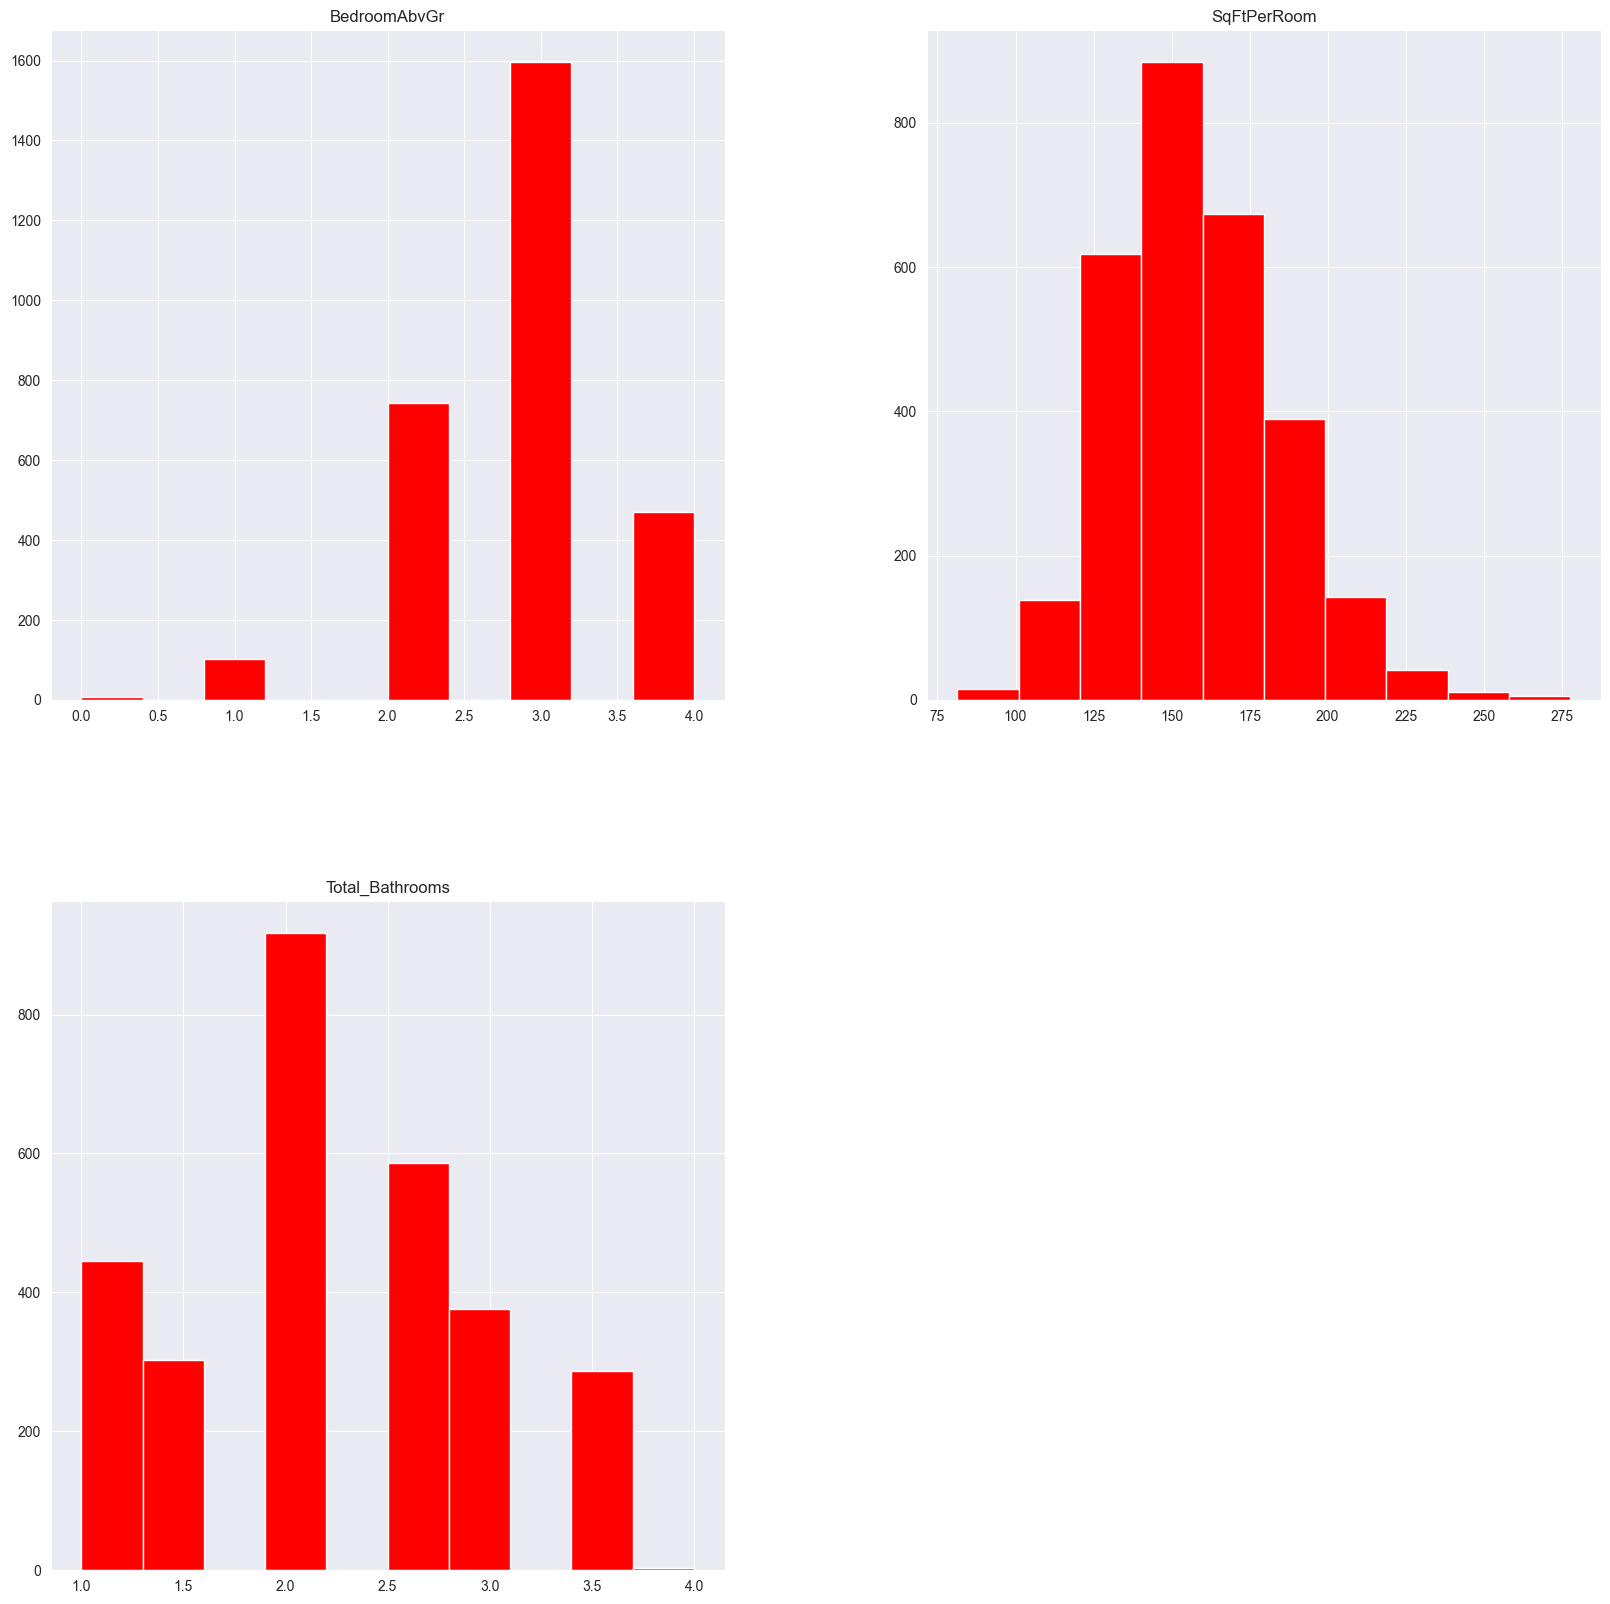

In [26]:
features.hist(figsize=(20, 20), xlabelsize=10, ylabelsize=10,color='red');

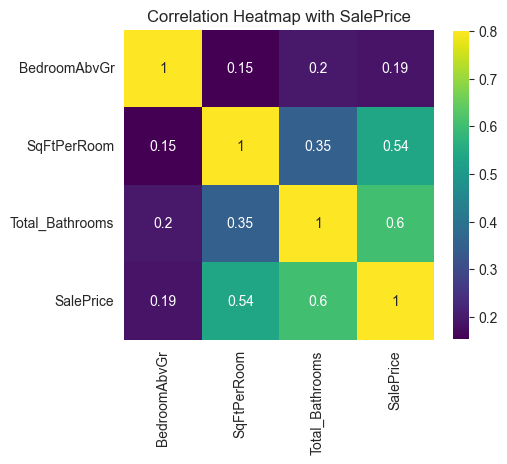

In [27]:
merged_data = pd.concat([features, target], axis=1)
plt.figure(figsize=(5, 5))
sns.heatmap(merged_data.select_dtypes('number').corr(), vmax=.8, annot=True, square=True, cmap='viridis', cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap with SalePrice')
plt.show()


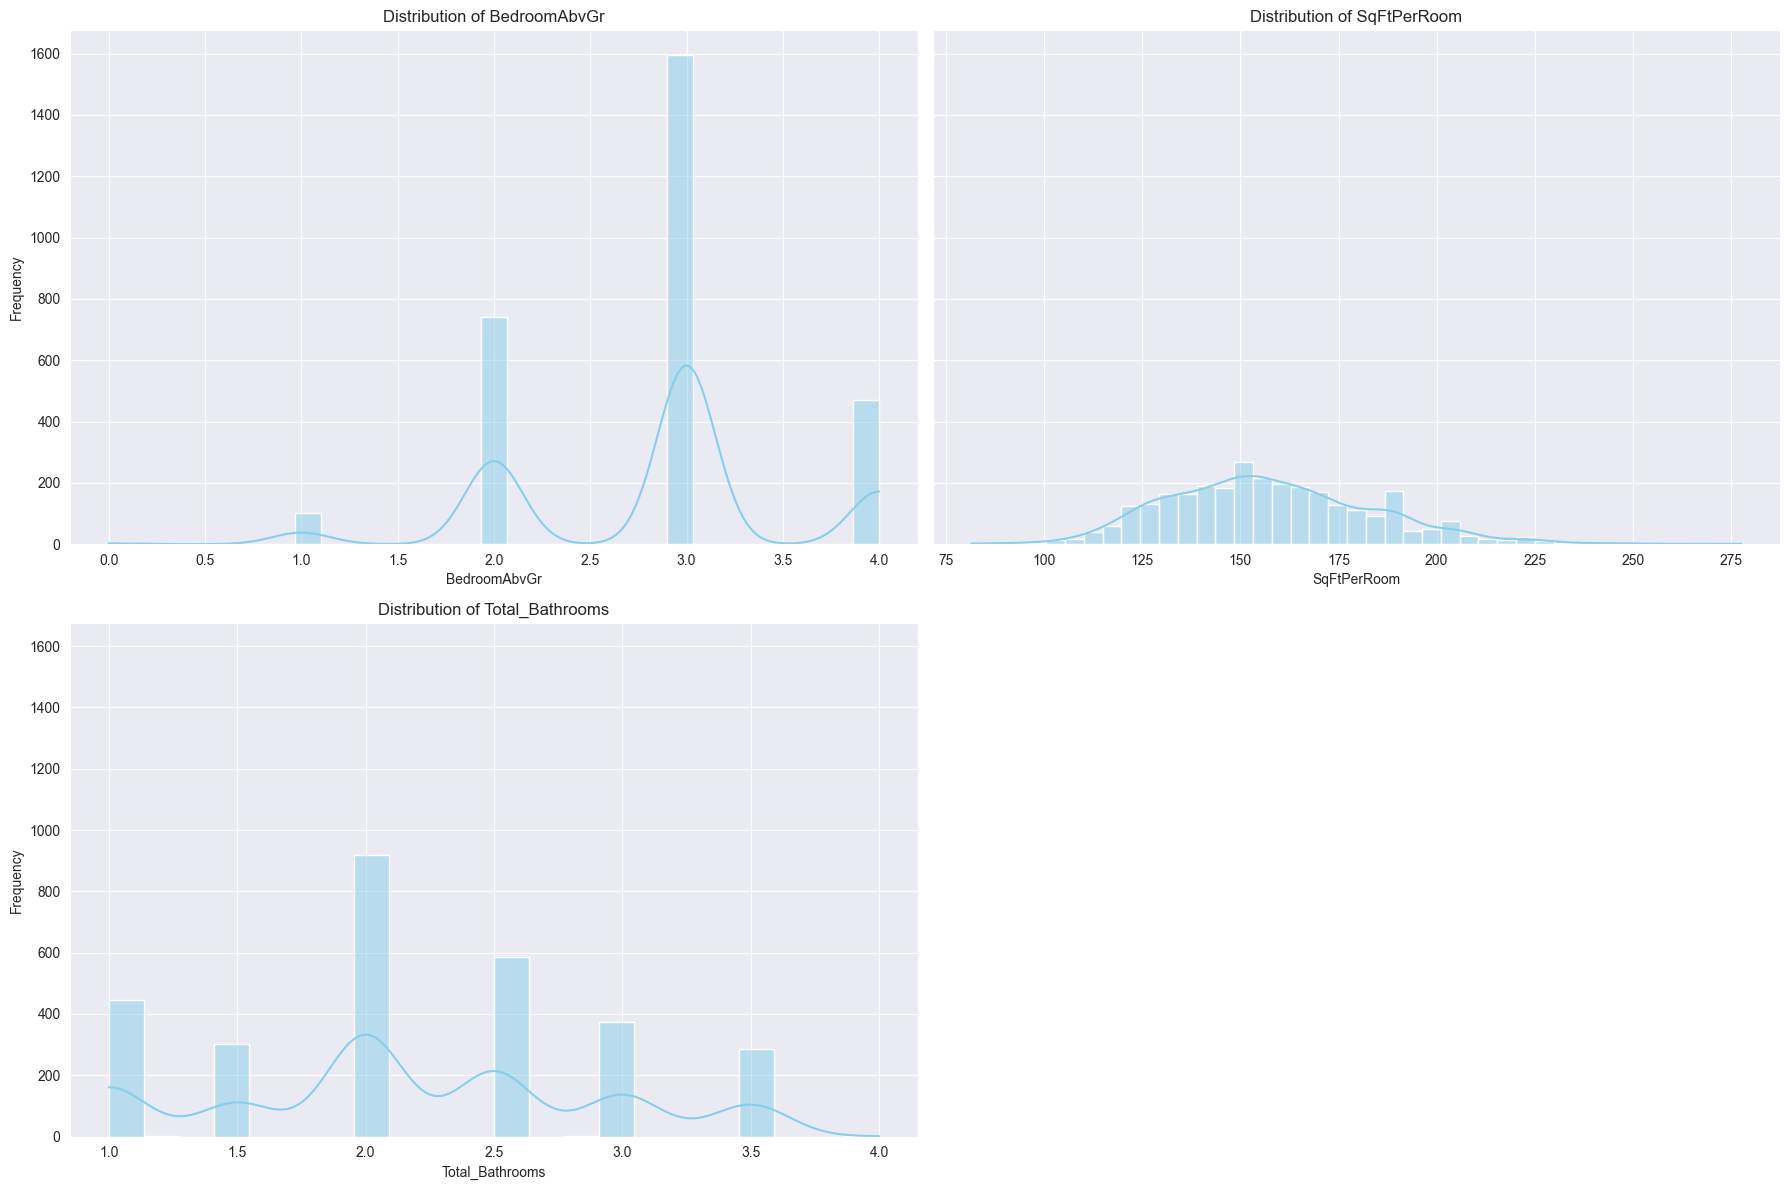

In [28]:
numerical_features = features.select_dtypes(include=['float64', 'int64'])

# Set the number of columns in each row
num_columns = 2

# Calculate the number of rows needed
num_rows = (len(numerical_features.columns) + num_columns - 1) // num_columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 6 * num_rows), sharey=True)
axes = axes.flatten()

# Plot distplots for each numerical feature
for i, column in enumerate(numerical_features.columns):
    if i >= len(axes):
        break
    sns.histplot(features[column], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {column}')

# Remove empty subplots if any
for i in range(len(numerical_features.columns), num_rows * num_columns):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Scaling

In [29]:
scaler = StandardScaler()
scaler.fit(features)

features = pd.DataFrame(scaler.transform(features), index = features.index, columns = features.columns)

In [30]:
features

,BedroomAbvGr,SqFtPerRoom,Total_Bathrooms
0,0.231589,-0.579078,1.783708
1,0.231589,-0.665430,0.437940
2,0.231589,0.789482,1.783708
3,0.231589,1.251145,-0.234945
4,1.578221,0.428460,1.783708
...,...,...,...
2914,0.231589,-0.806540,-0.907829
2915,0.231589,-1.381513,-0.907829
2916,1.578221,-0.825495,-0.234945
2917,0.231589,-1.384672,-0.907829


# Target Transformation

C:\Users\divya\AppData\Local\Temp\ipykernel_17856\834372256.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, kde = True, fit = scipy.stats.norm)
C:\Users\divya\AppData\Local\Temp\ipykernel_17856\834372256.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(target), kde = True, 

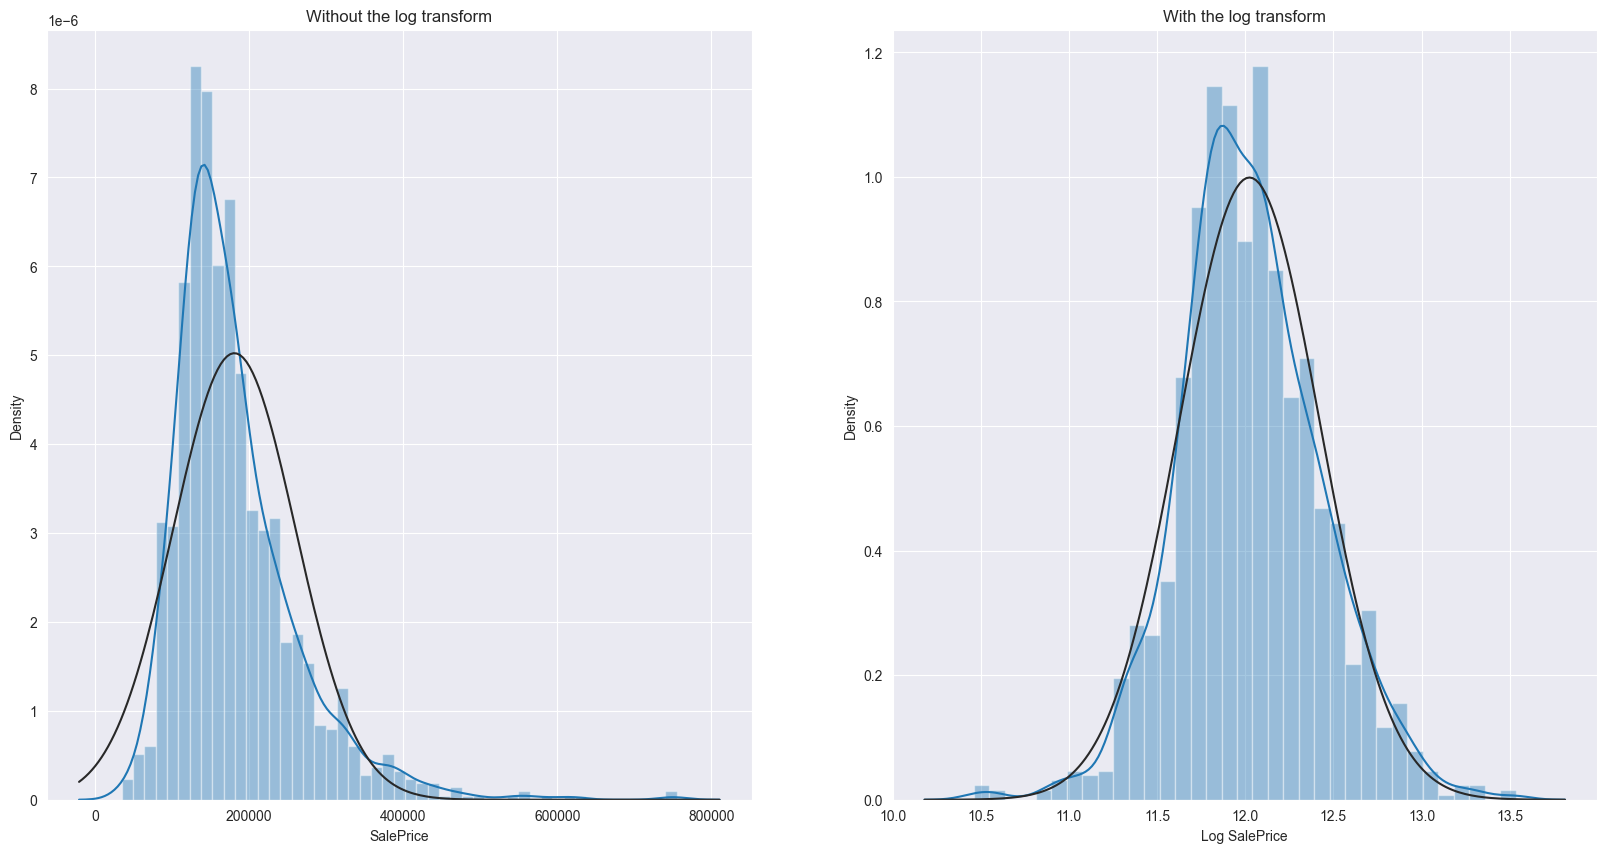

In [31]:
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
sns.distplot(target, kde = True, fit = scipy.stats.norm)
plt.title('Without the log transform')

plt.subplot(1,2,2)
sns.distplot(np.log(target), kde = True, fit = scipy.stats.norm)
plt.xlabel('Log SalePrice')
plt.title('With the log transform')

plt.show()

In [32]:
log_target = np.log(target)

# Split the data back

In [33]:
train_final = features.loc[:train0.index.max(), :].copy()

In [34]:
test_final = features.loc[train0.index.max() + 1:, :].reset_index(drop = True).copy()

In [35]:
test_final

,BedroomAbvGr,SqFtPerRoom,Total_Bathrooms
0,-1.115043,-1.128777,-1.580713
1,0.231589,-0.383209,-0.907829
2,0.231589,0.194291,0.437940
3,0.231589,-0.453285,0.437940
4,-1.115043,0.084351,-0.234945
...,...,...,...
1454,0.231589,-0.806540,-0.907829
1455,0.231589,-1.381513,-0.907829
1456,1.578221,-0.825495,-0.234945
1457,0.231589,-1.384672,-0.907829


In [36]:
log_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [75]:
# Initialize the linear regression model
models = {'lr': LinearRegression(fit_intercept=True),
          'ridge': Ridge(alpha = 4.3512805678879625),
          'lasso': Lasso(alpha = 4.27376884615669)}

# Train the model on the training set
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + ' trained.')

lr trained.
ridge trained.
lasso trained.


# Evaluation

In [76]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

In [77]:
results

{'lr': array([1.28519975, 1.28792409, 1.28355151, 1.29909146, 1.35878052,
        1.29294982, 1.28894153, 1.28551839, 1.30641865, 1.28890795]),
 'ridge': array([1.28513004, 1.28793202, 1.28368166, 1.29920179, 1.35885041,
        1.29286227, 1.28896773, 1.28535139, 1.30643693, 1.28885492]),
 'lasso': array([1.46039181, 1.48491364, 1.52879875, 1.53079906, 1.57516956,
        1.43341907, 1.47708604, 1.45453656, 1.46189049, 1.49653421])}

In [78]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

----------
lr
1.2977283660058343
0.02141435189852933
----------
ridge
1.297726917905147
0.021443566429258366
----------
lasso
1.4903539173425995
0.04096790509631975


In [79]:
r2_scores = {}

# Calculate R-squared scores for each model
for name, model in models.items():
    target_pred = np.exp(models[name].predict(train_final))
    r2 = r2_score(np.exp(log_target), target_pred)
    r2_scores[name] = r2
    print(f"R-squared score for {name}: {r2}")

R-squared score for lr: 0.4971174125603951
R-squared score for ridge: 0.49692287787830214
R-squared score for lasso: -0.03199240362969058


# Combine Prediction

In [80]:
final_predictions = (
    0.5 * np.exp(models['lr'].predict(test_final)) +
    0.5 * np.exp(models['ridge'].predict(test_final))
)

In [81]:
final_predictions

array([ 98259.17472165, 130294.58771384, 189208.30345731, ...,
       143830.30837065, 111632.88673188, 179444.89637466])

In [82]:
submission = pd.concat([test_id, pd.Series(final_predictions, name='SalePrice')], axis=1)

In [83]:
submission

,Id,SalePrice
0,1461,98259.174722
1,1462,130294.587714
2,1463,189208.303457
3,1464,171210.007625
4,1465,157397.202586
...,...,...
1454,2915,122052.834979
1455,2916,111687.336796
1456,2917,143830.308371
1457,2918,111632.886732
